`$ pip install yahoo-finance`  

[Yahoo Finance Package](https://github.com/lukaszbanasiak/yahoo-finance)

In [224]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [155]:
from yahoo_finance import Share
from pprint import pprint
from datetime import datetime, timedelta
from datetime import date
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import style

In [156]:
style.use('fivethirtyeight')

In [157]:
# 5 years rolling to date
days_to_subtract = 133

today_is = datetime.today()

five_years_to_date_is = datetime.today() - timedelta(days=days_to_subtract)

print ("Today is: ") + str(today_is.date()) + (" and 5 Years to Date is: ") + str(five_years_to_date_is.date())

Today is: 2017-05-14 and 5 Years to Date is: 2017-01-01


In [158]:
wege = Share('WEGE3.SA')
# gerdau = Share('GGBR4.SA')
# natura = Share('NATU3.SA')
# ccr = Share('CCRO3.SA')
# marcopolo = Share('POMO4.SA')

In [161]:
hoje = str(today_is.year) + "/" + str(today_is.month) + "/" + str(today_is.day) 
cinco_anos = str(five_years_to_date_is.year) + "/" + str(five_years_to_date_is.month) + "/" + str(five_years_to_date_is.day) 

hoje = date(*map(int, hoje.split('/')))
cinco_anos = date(*map(int, cinco_anos.split('/')))

hoje = str(hoje)
cinco_anos = str(cinco_anos)

In [162]:
df_wege = wege.get_historical(cinco_anos, hoje)
# df_gerdau = gerdau.get_historical(cinco_anos, hoje)
# df_natura = natura.get_historical(cinco_anos, hoje)
# df_ccr = ccr.get_historical(cinco_anos, hoje)
# df_marcopolo = marcopolo.get_historical(cinco_anos, hoje)

In [163]:
df_wege = json.dumps(df_wege)
# df_gerdau = json.dumps(df_gerdau)
# df_natura = json.dumps(df_natura)
# df_ccr = json.dumps(df_ccr)
# df_marcopolo = json.dumps(df_marcopolo)

In [164]:
df_wege = pd.read_json(df_wege)
# df_gerdau = pd.read_json(df_gerdau)
# df_natura = pd.read_json(df_natura)
# df_ccr = pd.read_json(df_ccr)
# df_marcopolo = pd.read_json(df_marcopolo)

In [170]:
df_wege = df_wege.sort_values(['Date'], ascending=[1])

In [182]:
n = 15

In [184]:
def MA(df, n):
    """
    Moving Average
    """
    result = df['Close'].rolling(window=n,center=False).mean()
    return (result)

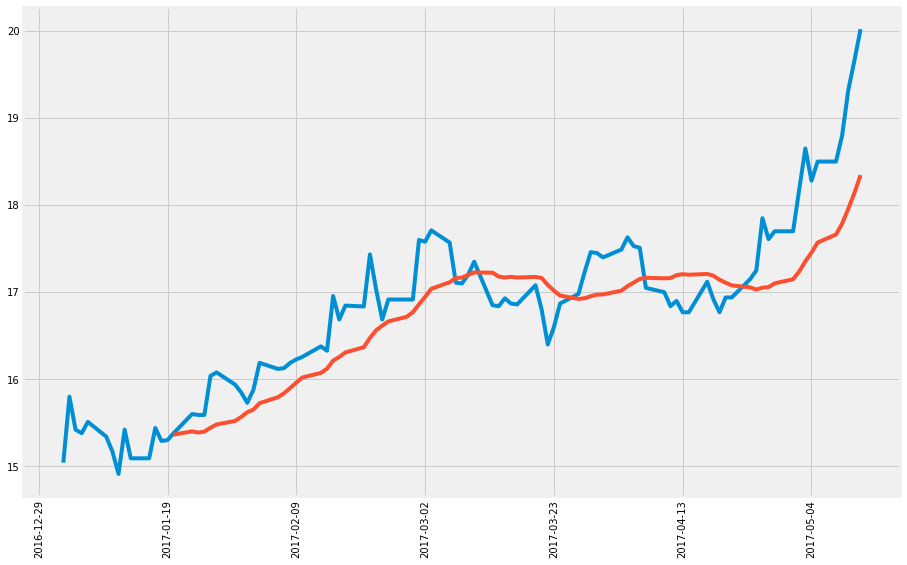

In [225]:
plt.xticks(rotation=90)
plt.plot(df_wege.Date, a, df_wege.Date, MA(df_wege, n))

In [221]:
def BBANDS(df, n):
    """
    Bollinger Bands
    """
    MA = df['Close'].rolling(window=n,center=False).mean()
    MSD = df['Close'].rolling(window=n,center=False).std()
    
    UpperBollinger = MA + (MSD * 2)
    LowerBollinger = MA - (MSD * 2)

    B1 = pd.Series(UpperBollinger, name='UpperBollinger_' + str(n))
    B2 = pd.Series(LowerBollinger, name='LowerBollinger_' + str(n))
    
    result = pd.DataFrame([B1, B2]).transpose()
    return (result)

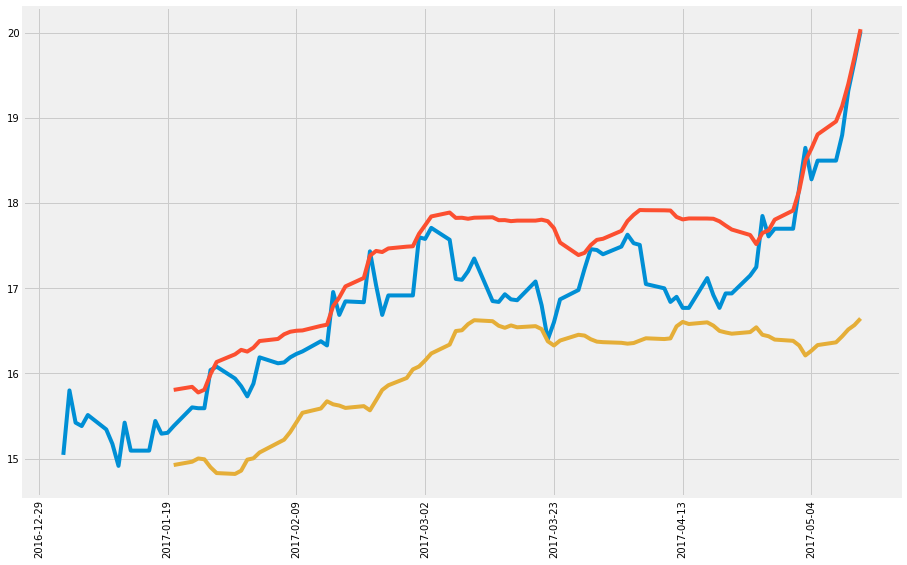

In [226]:
plt.xticks(rotation=90)
plt.plot(df_wege.Date, a
         ,df_wege.Date, BBANDS(df_wege, n).UpperBollinger_15
         ,df_wege.Date, BBANDS(df_wege, n).LowerBollinger_15
        )

In [228]:
def STOK(df):
    """
    Stochastic oscillator %K
    """
    result = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
    return (result)

In [232]:
def STO(df, n):
    """
    Stochastic oscillator %D
    """
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
    result = pd.Series(pd.ewma(SOk, span=n, min_periods=n - 1), name='SO%d_' + str(n))
    return (result)


In [233]:
STO(df_wege, n)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=15,min_periods=14,adjust=True).mean()


94         NaN
93         NaN
92         NaN
91         NaN
90         NaN
89         NaN
88         NaN
87         NaN
86         NaN
85         NaN
84         NaN
83         NaN
82         NaN
81    0.379087
80    0.432683
79    0.465084
78    0.491583
77    0.491583
76    0.548276
75    0.514107
74    0.527262
73    0.497815
72    0.469771
71    0.476516
70    0.510229
69    0.447222
68    0.465055
67    0.528145
66    0.565848
65    0.557244
        ...   
29    0.551086
28    0.584764
27    0.551512
26    0.528617
25    0.489658
24    0.486471
23    0.451073
22    0.428385
21    0.399740
20    0.399740
19    0.435774
18    0.428045
17    0.416008
16    0.453346
15    0.453346
14    0.491600
13    0.518658
12    0.567870
11    0.529874
10    0.553444
9     0.553444
8     0.603994
7     0.596985
6     0.554285
5     0.581280
4     0.546534
3     0.537953
2     0.600915
1     0.606094
0     0.601468
Name: SO%d_15, dtype: float64

In [234]:
def SMA(df, n):
    result = pd.rolling_mean(df['Close'], n, min_periods=n)
    return (result)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=15,window=15,center=False).mean()
  from ipykernel import kernelapp as app


94          NaN
93          NaN
92          NaN
91          NaN
90          NaN
89          NaN
88          NaN
87          NaN
86          NaN
85          NaN
84          NaN
83          NaN
82          NaN
81          NaN
80    15.365333
79    15.402667
78    15.388667
77    15.400000
76    15.444000
75    15.482000
74    15.522000
73    15.567333
72    15.622000
71    15.652667
70    15.726000
69    15.794667
68    15.840667
67    15.900667
66    15.962667
65    16.021333
        ...    
29    17.017333
28    17.070000
27    17.110000
26    17.152667
25    17.165333
24    17.160000
23    17.162667
22    17.196000
21    17.207333
20    17.200667
19    17.210000
18    17.189333
17    17.143333
16    17.109333
15    17.078667
14    17.056000
13    17.030667
12    17.052000
11    17.058667
10    17.102000
9     17.148667
8     17.238000
7     17.354667
6     17.455333
5     17.570667
4     17.662667
3     17.788000
2     17.958000
1     18.139333
0     18.344667
Name: Close, dtype: floa